# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 5_Machine Learning Overview and Algorithm

## 5. CVT & PCA



**Contents of this note refer to 1) book "Python Machine Learning"; 2) textbook "Data Science from Scratch"; 3) teaching materials at Department of Computer Science, William & Mary; 4) Python tutorial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

### What is Cross-Validation Test (CVT)?

CVT is also called K-fold Cross-Validation. 

Here, "the data is first partitioned into k equally (or nearly equally) sized segments or folds. Subsequently k iterations of training and validation are performed such that within each iteration a different fold of the data is held-out for validation while the remaining k − 1 folds are used for learning." (https://link.springer.com/referenceworkentry/10.1007/978-0-387-39940-9_565)

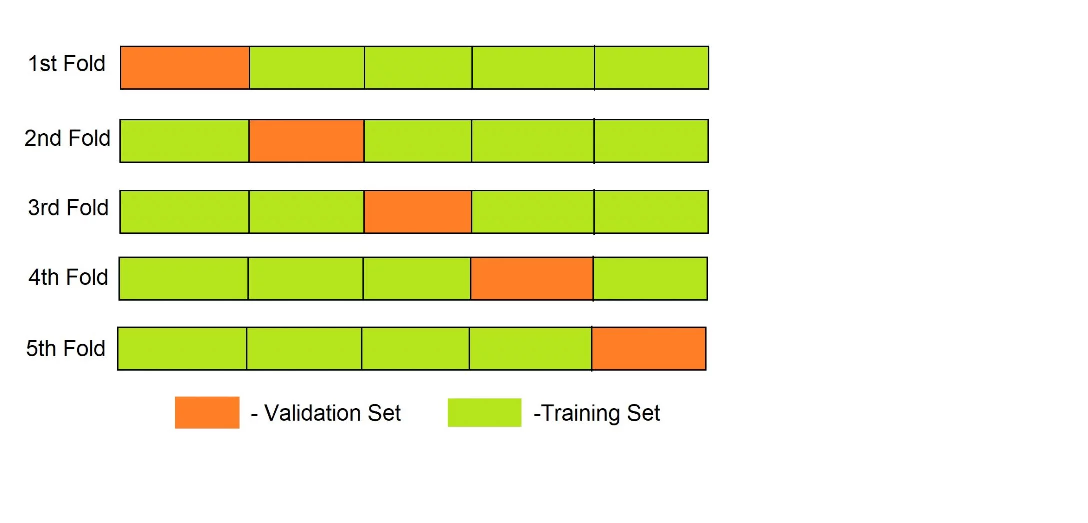
(Picture is from https://www.askpython.com/python/examples/k-fold-cross-validation)

Should have no overlap


The following example mainly refers to https://www.askpython.com/python/examples/k-fold-cross-validation

### Cross Validation on Breast Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
#Loading the dataset
data = load_breast_cancer(as_frame = True) # Import it as a dataframe
df = data.frame

X = df.iloc[:,:-1] # Selects from first to second to last
y = df.iloc[:,-1] # Selects the last column

In [2]:
# Implementing cross validation
k = 5  # number of fold
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy') # DT as the algorithm
 
acc_score = []
 
for train_index , test_index in kf.split(X): # Loop through kf.split(X) into 5 folders
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    DT.fit(X_train, y_train)
    pred_values = DT.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k # Avg accuaracy

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9203539823008849]
Avg accuracy : 0.9437199192671946


### Cross Validation Using cross_val_score()

In [3]:
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(DT , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9349169383636081


In [6]:
# In class practice
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Loading the dataset
data = load_iris(as_frame = True) # Import it as a dataframe
df = data.frame

X = df.iloc[:,:-1] # Selects from first to second to last
y = df.iloc[:,-1] # Selects the last column

k = 4  # number of fold
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy') # DT as the algorithm
 
acc_score = []
 
for train_index , test_index in kf.split(X): # Loop through kf.split(X) into 5 folders
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
     
    DT.fit(X_train, y_train)
    pred_values = DT.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k # Avg accuaracy

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

# Can trust the accuracy more

'''
k = 4
kf = KFold(n_splits=k, random_state=None)
DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(DT , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))
'''


accuracy of each fold - [1.0, 0.9736842105263158, 0.918918918918919, 0.7027027027027027]
Avg accuracy : 0.8988264580369844


'\nk = 4\nkf = KFold(n_splits=k, random_state=None)\nDT = DecisionTreeClassifier(criterion=\'entropy\')\n \nresult = cross_val_score(DT , X, y, cv = kf)\n \nprint("Avg accuracy: {}".format(result.mean()))\n'

## Principal component analysis (PCA)

The following example refers to https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

In [1]:
# 1. Follow the main direction (de-centralized data)- use variance or de-centralization
# 2. Select the important one
# Only works for linear distributions 
# Finds "prinical componenets"
# Dimension reduction
# Look on PPT SLIDES FOR THE MATH & DETAILS
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
data = load_iris(as_frame = True) # Import data as df 
iris_data = data.frame # Get the dat
# Label encoding since the algorithms we use 
# do not take non-numerical or boolean data as inputs
iris_data.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

iris_data.head() # Prints the first 5 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


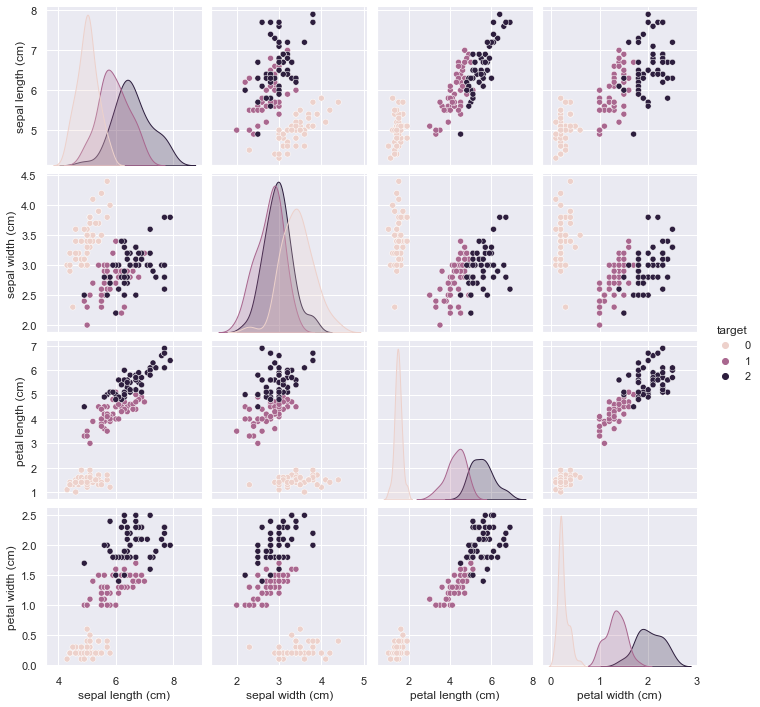

In [3]:
p = sns.pairplot(iris_data, hue = 'target') # Shows plot of different targets
# Uses different colors to show different clusters- for your obs

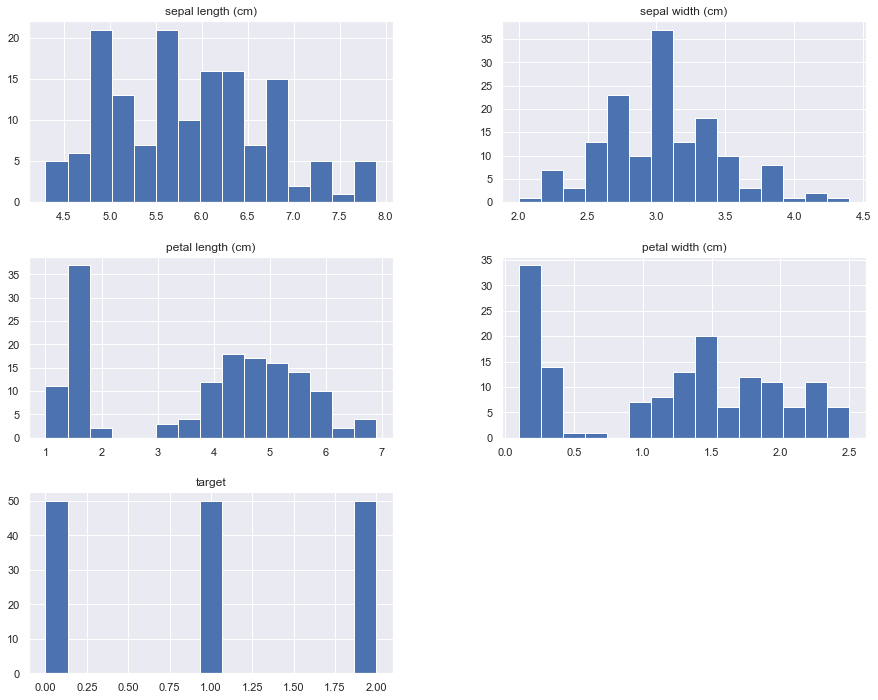

In [4]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Distribution of each attribute- for your obs

In [5]:
X = iris_data.iloc[:,:-1] # All the row, from the first to the second to last 
y = iris_data.iloc[:,-1] # All the rows only that last 


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X) # Do the PCA on x

pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [7]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Below are the eigenvalues

[0.92461872 0.05306648 0.01710261 0.00521218]


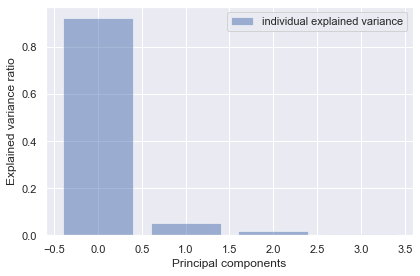

In [8]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Classification using only 2 principal components:

In [9]:
pca = PCA(n_components = 2) # How many componenets -> how many dimensions you try to convert to 
X_new = pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9333333333333333 %


Classification using only 3 principal components:

In [10]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


Classification using all 4 principal components:

In [11]:
pca=PCA(n_components=4)
X_new=pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA", knn_pca.score(X_test_new,y_test), "%")

Train score after PCA 0.9714285714285714 %
Test score after PCA 0.9777777777777777 %


In [14]:
# Use PCA to analyze the breast cancer dataset 
# USE DT 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
#Loading the dataset
data = load_breast_cancer(as_frame = True) # Import it as a dataframe
data = data.frame

X = data.iloc[:,:-1] # All the row, from the first to the second to last 
y = data.iloc[:,-1] # All the rows only that last 

from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X) # Do the PCA on x

pca.get_covariance()

# Below are the eigenvalues
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


pca = PCA(n_components = 3) # How many componenets -> how many dimensions you try to convert to (3, 5, 7)
X_new = pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA (3)", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA (3)", knn_pca.score(X_test_new,y_test), "%")



pca = PCA(n_components = 5) # How many componenets -> how many dimensions you try to convert to (3, 5, 7)
X_new = pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA (5)", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA (5)", knn_pca.score(X_test_new,y_test), "%")



pca = PCA(n_components = 7) # How many componenets -> how many dimensions you try to convert to (3, 5, 7)
X_new = pca.fit_transform(X)

X_train_new, X_test_new, y_train, y_test = \
    train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA (7)", knn_pca.score(X_train_new,y_train), "%")
print("Test score after PCA (7)", knn_pca.score(X_test_new,y_test), "%")




[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]
Train score after PCA (3) 0.9547738693467337 %
Test score after PCA (3) 0.8947368421052632 %
Train score after PCA (5) 0.9597989949748744 %
Test score after PCA (5) 0.8947368421052632 %
Train score after PCA (7) 0.9597989949748744 %
Test score after PCA (7) 0.8947368421052632 %
